In [1]:
import importlib

import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
import aux_Func as aux_Func
from sklearn.model_selection import train_test_split

In [ ]:
# MACROS
NDATASETS = 50
N_TRAIN_SAMPLES = 15
NCVALUES = 20

In [ ]:
DataMatrix = [ []*2 for i in range(NDATASETS)]
matrixDatasetTraintest =  [ []*4 for i in range(NDATASETS)]
matrixXYtrainparts =  [[[]*2 for j in range(N_TRAIN_SAMPLES)] for i in range(NDATASETS)]

In [14]:
DataMatrix = aux_Func.createDatasetRegression(NDATASETS, linear=False, nSamples=1000, nFeatures=10, noise=1)

In [15]:
for i in range(NDATASETS):
    X_train, X_test, y_train, y_test = train_test_split(DataMatrix[i][0], DataMatrix[i][1], random_state=4, test_size=0.20, shuffle=True)
    matrixDatasetTraintest[i].extend((X_train, X_test, y_train, y_test))

In [16]:
listTrainSamples = np.logspace(4, 7, num=N_TRAIN_SAMPLES, base=2)
listTrainSamples = [round(item, 0) for item in listTrainSamples]
listTrainSamples

[16.0,
 19.0,
 22.0,
 25.0,
 29.0,
 34.0,
 39.0,
 45.0,
 53.0,
 61.0,
 71.0,
 82.0,
 95.0,
 110.0,
 128.0]

In [17]:
for i in range(NDATASETS):
    for idx, el in enumerate(listTrainSamples):
        XtrainDivided = matrixDatasetTraintest[i][0][0:int(el)]
        
        YtrainDivided = matrixDatasetTraintest[i][2][0:int(el)]
        matrixXYtrainparts[i][idx].extend((XtrainDivided, YtrainDivided))

In [18]:
c_dict ={'c_value':np.logspace(-1, 7, num=NCVALUES, base=2)}
c_dict

{'c_value': array([  0.5       ,   0.66945205,   0.8963321 ,   1.20010272,
          1.60682245,   2.15138117,   2.88049308,   3.85670399,
          5.16375679,   6.91377515,   9.2568819 ,  12.39407714,
         16.59448071,  22.21841828,  29.74833136,  39.83016286,
         53.32876841,  71.40210674,  95.60057355, 128.        ])}

# SVM #

## SVM cambiando C ##

In [19]:
svms = []
matrixSVMResults = np.zeros([NDATASETS,N_TRAIN_SAMPLES,NCVALUES,2])


# Creamos los diferentes ridge regressors
for c_value in c_dict.get('c_value'):
    svms.append(SVR(C=float(c_value)))

print(svms)

for i in range(NDATASETS):
    for j in range(len(listTrainSamples)):
        for idx, svm in enumerate(svms):
            svm.fit(matrixXYtrainparts[i][j][0], matrixXYtrainparts[i][j][1])
            y_pred = svm.predict(matrixDatasetTraintest[i][1])
            
            matrixSVMResults[i][j][idx][0] = svm.C
            matrixSVMResults[i][j][idx][1] = r2_score(matrixDatasetTraintest[i][3], y_pred)

[SVR(C=0.5), SVR(C=0.6694520506122361), SVR(C=0.8963320961378558), SVR(C=1.2001027195781029), SVR(C=1.6068224531337647), SVR(C=2.151381172440365), SVR(C=2.880493075077518), SVR(C=3.85670399176998), SVR(C=5.163756791789619), SVR(C=6.913775146252844), SVR(C=9.256881898261756), SVR(C=12.394077138133248), SVR(C=16.59448071113907), SVR(C=22.218418281834488), SVR(C=29.748331360268995), SVR(C=39.83016286284875), SVR(C=53.328768409506836), SVR(C=71.40210673673876), SVR(C=95.60057354588706), SVR(C=128.0)]


In [20]:
#np.save('matrices/matrixSVMResults', matrixSVMResults)

In [21]:
matrixSVMResults = np.load('matrices/matrixSVMResults.npy')

In [22]:
for index in range(N_TRAIN_SAMPLES):
    print(matrixSVMResults[i][index][0])

[0.5        0.04311051]
[0.5        0.04424659]
[0.5        0.06469957]
[0.5        0.08613227]
[0.5       0.0971122]
[0.5        0.11123859]
[0.5        0.12921932]
[0.5        0.13945129]
[0.5        0.14949076]
[0.5        0.16997619]
[0.5        0.21279657]
[0.5        0.24255623]
[0.5       0.2844128]
[0.5        0.30834566]
[0.5        0.35351626]


## Dibujar Grafica ##

In [23]:
c_values = c_dict.get('c_value')
#r2_scores = [ []*25 for i in range(NSAMPLES)]
r2_scores = np.zeros([N_TRAIN_SAMPLES, NCVALUES])

#MatrixRidgeResultsInvertida =  [[[]*2 for j in range(NSAMPLES)] for i in range(25)]
MatrixSVMResultsInvertida = np.zeros([NCVALUES, N_TRAIN_SAMPLES, 2])

num_dataset = 2

for i_sample in range(N_TRAIN_SAMPLES):
    for i_alphavalue in range(NCVALUES):
        for i_dataset in range(NDATASETS):
            listR2ScoreDataset = []
            listR2ScoreDataset.append(matrixSVMResults[i_dataset][i_sample][i_alphavalue][1])
            MatrixSVMResultsInvertida[i_alphavalue][i_sample][0] = matrixSVMResults[i_dataset][i_sample][i_alphavalue][0]
            MatrixSVMResultsInvertida[i_alphavalue][i_sample][1] = mean(listR2ScoreDataset)



for idx_sample in range(N_TRAIN_SAMPLES):
    for idx_alphavalue in range(NCVALUES):
        r2_scores[idx_sample][idx_alphavalue] = MatrixSVMResultsInvertida[idx_alphavalue][idx_sample][1]




In [25]:
print(r2_scores)

[[0.04311051 0.05431307 0.06688298 0.08145946 0.10079997 0.12938033
  0.17092262 0.21477979 0.25266093 0.27020882 0.26966831 0.26161134
  0.26161134 0.26161134 0.26161134 0.26161134 0.26161134 0.26161134
  0.26161134 0.26161134]
 [0.04424659 0.0543331  0.06783181 0.08307503 0.09789167 0.1157169
  0.14561565 0.18048397 0.21314962 0.24388131 0.26002787 0.28676404
  0.29399949 0.29399949 0.29399949 0.29399949 0.29399949 0.29399949
  0.29399949 0.29399949]
 [0.06469957 0.07963626 0.0935389  0.10430966 0.11745023 0.13727052
  0.16819781 0.20458654 0.24802428 0.28232534 0.29998216 0.32537991
  0.33691028 0.33691028 0.33691028 0.33691028 0.33691028 0.33691028
  0.33691028 0.33691028]
 [0.08613227 0.10612223 0.12552125 0.14400088 0.16459075 0.20271745
  0.25083597 0.31309665 0.37338345 0.41966133 0.46486842 0.50295725
  0.50745975 0.50745975 0.50745975 0.50745975 0.50745975 0.50745975
  0.50745975 0.50745975]
 [0.0971122  0.12051807 0.14804662 0.18126371 0.22067372 0.27272664
  0.33280009 0.40

### Dibujar Cambiando C ###

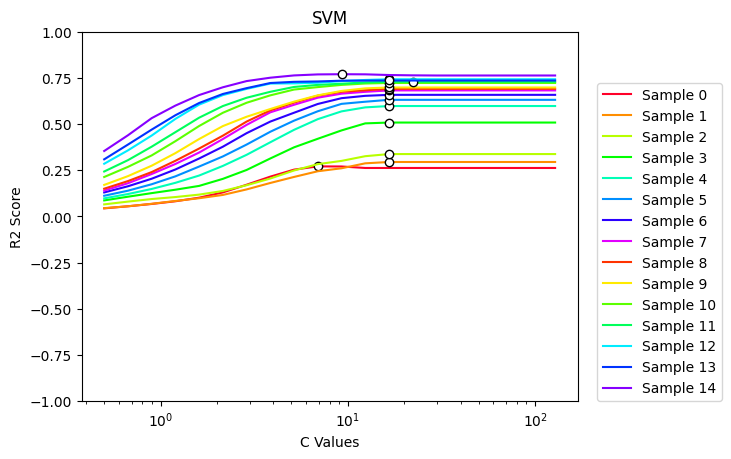

In [24]:
f, ax = plt.subplots(1)

ax.set_ylim(ymin=-1)
cm = plt.get_cmap('gist_rainbow')
ax.set_prop_cycle('color', [cm(1.*i/15) for i in range(N_TRAIN_SAMPLES)])

plt.xscale('log')
plt.title("SVM")
plt.xlabel("C Values")
plt.ylabel("R2 Score")


for i_sample in range(N_TRAIN_SAMPLES):
    plt.plot(c_values, r2_scores[i_sample], label = "Sample " + str(i_sample))
    maxValue = np.amax(r2_scores[i_sample])
    i_maxValue = np.where(r2_scores[i_sample] == maxValue)
    plt.plot(c_values[i_maxValue][0], maxValue, marker = "o", markeredgecolor = "black", markerfacecolor="white")
plt.legend(loc=(1.04, 0),title="Samples")
plt.show(f)